In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [12]:

#df = pd.read_csv('../outputs.ath/rarefy/explain.SRR5241537.k31.csv')
df = pd.read_csv('../outputs.ath/rarefy/explain.SRR12795785.k31.csv')



#df = df[df['metag'] == 'ERR3211919']

In [13]:
df

,iteration,position,cumulative,metag
0,0,0,0.945769,SRR12795785
1,0,100,0.945769,SRR12795785
2,0,200,0.945772,SRR12795785
3,0,300,0.945772,SRR12795785
4,0,400,0.945772,SRR12795785
...,...,...,...,...
1145,9,11000,0.945977,SRR12795785
1146,9,11100,0.945980,SRR12795785
1147,9,11200,0.945980,SRR12795785
1148,9,11300,0.945980,SRR12795785


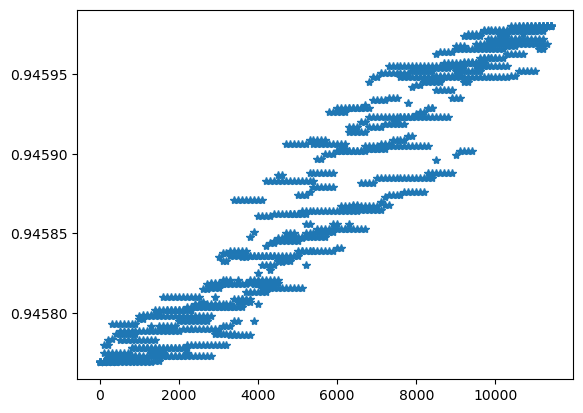

In [14]:
plt.plot(df.position, df.cumulative, '*')

In [15]:
df = df.sort_values(by=["iteration", "position"])

# Group by iteration and calculate cumulative kmers per sample position
#df["cumulative"] = df.groupby("iteration")["cumulative"]

# Calculate mean and std across iterations at each sample position
summary = df.groupby("position")["cumulative"].agg(["mean", "std"]).reset_index()
summary

,position,mean,std
0,0,0.945769,0.000000
1,100,0.945771,0.000004
2,200,0.945773,0.000005
3,300,0.945774,0.000008
4,400,0.945775,0.000008
...,...,...,...
110,11000,0.945974,0.000009
111,11100,0.945976,0.000005
112,11200,0.945976,0.000005
113,11300,0.945979,0.000003


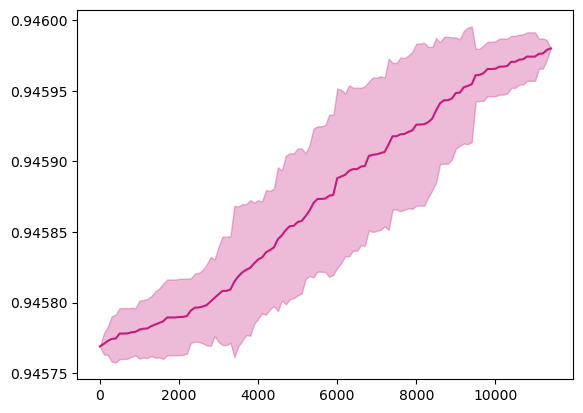

In [16]:
x_kmer = summary["position"]
mean_kmer = summary["mean"]
std_kmer = summary["std"]

plt.plot(x_kmer, mean_kmer, color="#c51b7d", label="Mean cumulative k-mers")
plt.fill_between(x_kmer, mean_kmer-2*std_kmer, mean_kmer+2*std_kmer, alpha=0.3, color="#c51b7d")
#plt.ylim(0, 1)

In [17]:
df

,iteration,position,cumulative,metag
0,0,0,0.945769,SRR12795785
1,0,100,0.945769,SRR12795785
2,0,200,0.945772,SRR12795785
3,0,300,0.945772,SRR12795785
4,0,400,0.945772,SRR12795785
...,...,...,...,...
1145,9,11000,0.945977,SRR12795785
1146,9,11100,0.945980,SRR12795785
1147,9,11200,0.945980,SRR12795785
1148,9,11300,0.945980,SRR12795785


In [18]:
summary

,position,mean,std
0,0,0.945769,0.000000
1,100,0.945771,0.000004
2,200,0.945773,0.000005
3,300,0.945774,0.000008
4,400,0.945775,0.000008
...,...,...,...
110,11000,0.945974,0.000009
111,11100,0.945976,0.000005
112,11200,0.945976,0.000005
113,11300,0.945979,0.000003


In [19]:
mmax = max(summary["mean"])

In [20]:
mmin = min(summary["mean"])

In [21]:
mmax - mmin

0.00021100000000018326